In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
plt.style.use('seaborn-whitegrid')
from utils import PkdbModel, ccolors ,markers, category_filter,convert_unit, \
    caffeine_idx,pktype_data,abs_idx,rel_idx,filter_out,filter_df,group_idx,individual_idx
from scipy import stats


def _regression(t, c):
    """ Linear regression on the log timecourse after maximal value.
    No check is performed if already in equilibrium distribution !.
    The linear regression is calculated from all data points after the maximum.

    :return:
    """
    # TODO: check for distribution and elimination part of curve.
    max_index = np.argmax(c)
    # linear regression
    x = t[max_index :]
    y = np.log(c[max_index :])
    if max_index == (len(c) - 1):
        return [np.nan] * 6
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return [slope, intercept, r_value, p_value, std_err, max_index]



In [2]:
from pkdb_app.analysis.pharmacokinetic import f_pk

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
caffeine_tc = PkdbModel("caffeine_timecourse",destination="3-inferred")
caffeine_tc.read()
caffeine_tc.to_array()
caffeine_timecourse = caffeine_tc.data

In [5]:
caffeine_timecourse.groupby(('oral contraceptives', 'choice')).get_group('Y')[["study","value","mean","unit_intervention","unit","subject_type","time_unit","subject_type"]]

,study,value,mean,unit_intervention,unit,subject_type,time_unit,subject_type
6,Patwardhan1980,NaN,"[3.79, 6.32, 6.83, 7.37, 6.0, 6.29, 5.09, 4.81...",mg,µg/ml,group,h,group
315,Patwardhan1980,NaN,"[3.79, 6.32, 6.83, 7.37, 6.0, 6.29, 5.09, 4.81...",mg/kg,µg/ml,group,h,group
325,Patwardhan1980,NaN,"[0.06489726, 0.10821918, 0.11695205, 0.1261986...",mg,µg/ml/kg,group,h,group
335,Patwardhan1980,NaN,"[0.06489726, 0.10821918, 0.11695205, 0.1261986...",mg/kg,µg/ml/kg,group,h,group


In [7]:
r_caffeine_idx = (caffeine_timecourse["unit"]=="µg/ml") & (caffeine_timecourse["unit_intervention"]=="mg")& (caffeine_timecourse["time_unit"]=="h")
caffeine_timecourse_abs = caffeine_timecourse[r_caffeine_idx]
caffeine_timecourse_abs["outlier"] = False
caffeine_timecourse_abs.loc[caffeine_timecourse_abs["study"] == "Balogh1992","outlier"] = True

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
caffeine_timecourse_abs.groupby("study").get_group("Balogh1992")[["time","value","substance_name","value_intervention","time_unit"]]


,time,value,substance_name,value_intervention,time_unit
13,"[2.0, 10.0]","[2.56, 0.22]",caffeine,225.0,h
14,"[2.0, 10.0]","[2.94, 0.33]",caffeine,225.0,h
15,"[2.0, 10.0]","[2.94, 0.18]",caffeine,225.0,h
16,"[2.0, 10.0]","[2.62, 0.17]",caffeine,225.0,h
17,"[2.0, 10.0]","[2.68, 0.17]",caffeine,225.0,h
18,"[2.0, 10.0]","[3.06, 0.12]",caffeine,225.0,h
19,"[2.0, 10.0]","[5.12, 1.79]",caffeine,225.0,h
20,"[2.0, 10.0]","[5.16, 1.84]",caffeine,225.0,h
21,"[2.0, 10.0]","[4.96, 1.62]",caffeine,225.0,h
22,"[2.0, 10.0]","[4.18, 1.39]",caffeine,225.0,h


In [9]:
def clearance(kwargs):
    dose = kwargs["value_intervention"]
    t = kwargs["time"]
    if kwargs["subject_type"] == "individual":
        c = kwargs["value"]
    else:
        c = kwargs["mean"]
    [slope, intercept, r_value, p_value, std_err,max_index] =_regression(t,c)
    vd = dose/np.exp(intercept)
    kel = -slope
    clearance = kel*vd
    return clearance
    
    

    

In [14]:
caffeine_timecourse_abs["clearance"] = caffeine_timecourse_abs.apply(lambda x: clearance(x),axis=1)
caffeine_timecourse_bal = caffeine_timecourse_abs.groupby("study").get_group("Balogh1992") 
caffeine_clr =  PkdbModel("caffeine_clearance",destination="3-inferred")
caffeine_clr.read()
caffeine_clearance = caffeine_clr.data
caffeine_clearance_idx = (caffeine_clearance["unit_intervention"]=="mg") & (caffeine_clearance["unit"]=="l/h")
caffeine_clearance = caffeine_clearance[caffeine_clearance_idx]
caffeine_clearance["clearance"] = caffeine_clearance["value"]
caffeine_clearance_bal = caffeine_clearance.groupby("study").get_group("Balogh1992")
print(len(caffeine_clearance_bal))
print(len(caffeine_timecourse_bal))

caffeine_clearance_concat = pd.concat([caffeine_timecourse_bal,caffeine_clearance_bal], ignore_index=True)

73
72


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/numpy/lib/function_base.py:2320: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

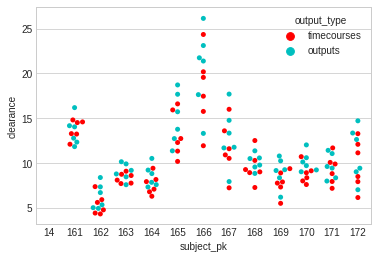

In [15]:
sns.swarmplot(x="subject_pk", y="clearance", hue="output_type",
              palette=["r", "c"], data=caffeine_clearance_concat)

In [16]:
caffeine_clearance_bal[["clearance","unit","value_intervention","unit_intervention", "subject_pk"]].head()

,clearance,unit,value_intervention,unit_intervention,subject_pk
1034,12.348,l/h,225.0,mg,161
1035,12.789,l/h,225.0,mg,161
1036,11.844,l/h,225.0,mg,161
1037,14.049,l/h,225.0,mg,161
1038,14.175,l/h,225.0,mg,161


In [17]:
caffeine_timecourse_bal[["clearance","unit","value_intervention","unit_intervention", "subject_pk"]].head()

,clearance,unit,value_intervention,unit_intervention,subject_pk
13,14.598112,µg/ml,225.0,mg,161
14,12.110163,µg/ml,225.0,mg,161
15,13.291677,µg/ml,225.0,mg,161
16,14.818570,µg/ml,225.0,mg,161
17,14.524289,µg/ml,225.0,mg,161


In [18]:
caffeine_timecourse_abs.groupby(["unit","unit_intervention","time_unit","subject_type"]).count()


study  output_type  pk  \
unit  unit_intervention time_unit subject_type                           
µg/ml mg                h         group            15           15  15   
                                  individual       72           72  72   

                                                tissue  substance_name  \
unit  unit_intervention time_unit subject_type                           
µg/ml mg                h         group             15              15   
                                  individual        72              72   

                                                pktype  interventions  \
unit  unit_intervention time_unit subject_type                          
µg/ml mg                h         group             15             15   
                                  individual        72             72   

                                                individual_pk  value  time  \
unit  unit_intervention time_unit subject_type                               
µg/ml mg                h         group                     0      0    15   
                                  individual               72     72    72   

                                                  ...      (percent fat, sd)  \
unit  unit_intervention time_unit subject_type    ...                          
µg/ml mg                h         group           ...                      0   
                                  individual      ...                      0   

                                                (percent fat, se)  \
unit  unit_intervention time_unit subject_type                      
µg/ml mg                h         group                         0   
                                  individual                    0   

                                                (percent fat, unit)  \
unit  unit_intervention time_unit subject_type                        
µg/ml mg                h         group                           0   
                                  individual                      0   

                                                (metabolic ratio, count)  \
unit  unit_intervention time_unit subject_type                             
µg/ml mg                h         group                                0   
                                  individual                           0   

                                                (metabolic ratio, max)  \
unit  unit_intervention time_unit subject_type                           
µg/ml mg                h         group                              0   
                                  individual                         0   

                                                (metabolic ratio, mean)  \
unit  unit_intervention time_unit subject_type                            
µg/ml mg                h         group                               0   
                                  individual                          0   

                                                (metabolic ratio, min)  \
unit  unit_intervention time_unit subject_type                           
µg/ml mg                h         group                              0   
                                  individual                         0   

                                                (metabolic ratio, unit)  \
unit  unit_intervention time_unit subject_type                            
µg/ml mg                h         group                               0   
                                  individual                          0   

                                                outlier  clearance  
unit  unit_intervention time_unit subject_type                      
µg/ml mg                h         group              15         14  
                                  individual         72         72  

[2 rows x 223 columns]

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


(2.0070918679826198e-05, 0.04748875088118857)

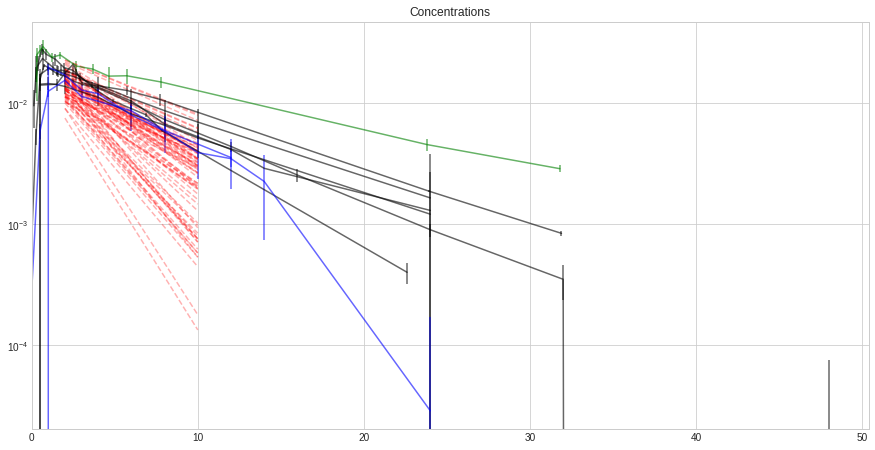

In [20]:
#ns.lineplot(x="time", y="mean",data=caffeine_timecourse_relative)
# caffeine clearance
fig, ax, = plt.subplots(nrows=1, ncols=1, figsize=(15, 7.5))


df = caffeine_timecourse_abs[ individual_idx(caffeine_timecourse_abs)]
df_group = caffeine_timecourse_abs[ group_idx(caffeine_timecourse_abs)]

for category in ccolors:
    cf_filter = category_filter[category]
    df_category = filter_df(cf_filter,df)
    for idx,row in df_category.iterrows():
        x = row["time"]
        y = row["value"]/row["value_intervention"]

        ax.plot(x, y,color=ccolors[category], linestyle="--", alpha=0.3,label=None)#marker=markers[category],
        #units = df_category["unit"].unique()
        #unit_intervention = df_category["unit_intervention"].unique()


        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))



    df_category = filter_df(cf_filter,df_group)
    df_category = df_category[df_category["mean"].notnull()]
    for idx,row in df_category.iterrows():
        x = row["time"]
        y = row["mean"]/row["value_intervention"]
        y_err = row["se"]/row["value_intervention"]
        ax.errorbar(x, y,yerr=y_err,color=ccolors[category], alpha=0.6,label=None)#marker=markers[category],
        #units = df_category["unit"].unique()
        #unit_intervention = df_category["unit_intervention"].unique()


    #x_group = df_category["time"]
    #y_group = df_category["mean"]
    #count_group = list(df_category[("weight","count")])



ax.set_title('Concentrations')
ax.set_xlim(left=0)
ax.set_yscale("log")
ax.set_ylim(bottom=0)
#ax.legend()


In [ ]:
caffeine_timecourse_relative["study"].unique()

In [ ]:
caffeine_tc.data.groupby(["subject_type","study"]).apply(lambda x : len(x["pk"].unique()))